<a href="https://colab.research.google.com/github/HyungJunGoo/ComputerVision/blob/main/CV_Excersice_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering

영상에 다양한 필터를 적용하여 영상으로부터의 효과를 알기 위한 실험을 진행

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img = x_train[0]
height, width = img.shape
print(height, width)

11493376/11490434 [==============================] - 0s 0us/step
28 28


# Box filter

주어진 영상에 3X3의 크기를 갖는 box filter를 적용한 후에 이에 대한 효과를 알아보도록 함

In [ ]:
kernel = np.ones((3,3), np.float32)/9
print(kernel)
print(kernel.shape[1])
print(kernel.shape[0])

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
3
3


# Convolution
주어진 영상과 box filter의 convolution 연산을 통하여 smoothing 효과 구현.

주의할 점 : 일번적으로 영상에서의 dtype은 uint8(0~255)이지만 현재 데이터의 값은 int32인 점 유의하기 바람

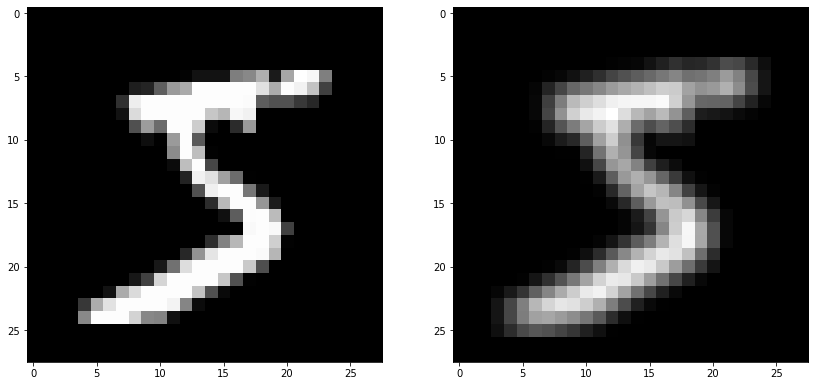

In [ ]:
filtered_img = np.zeros([height, width], dtype=np.int32)
for i in range(1, height-1):
    for j in range(1, width-1):
        conv_value = 0
        for n in range(kernel.shape[1]):
            for m in range(kernel.shape[0]):
                conv_value += img[i+n-1][j+m-1]*kernel[n][m]
        filtered_img[i][j] = int(conv_value)


plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(filtered_img, cmap='gray')

plt.show()

주어진 영상에 sharpening을 활용하기 위한 방법

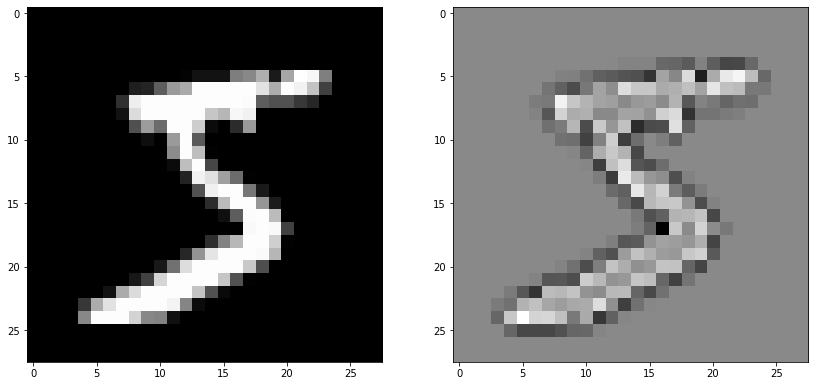

In [ ]:
sharp_kernel = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]), np.float32)

sharped_img = np.zeros([height, width], dtype=np.int32)

for i in range(1, height-1):
    for j in range(1, width-1):
        conv_value = 0
        for n in range(sharp_kernel.shape[1]):
            for m in range(sharp_kernel.shape[0]):
                conv_value += img[i+n-1][j+m-1]*sharp_kernel[n][m]
        sharped_img[i][j] = int(conv_value)


plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(sharped_img, cmap='gray')

OpenCV 라이브러리를 이용한 영상 필터링
*   Box filtering을 위하여 blur 명령어 사용

In [ ]:
blur = cv2.blur(img, (3,3))

OpenCV 라이브러리를 이용한 영상 필터링
*   Gaussian filtering을 위하여 GaussianBlur명령어 사용

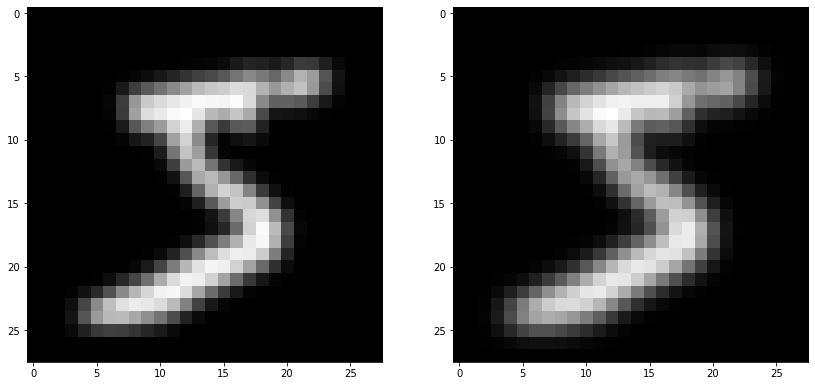

In [ ]:
blur_3X3 = cv2.GaussianBlur(img,(3,3), 0)
blur_5X5 = cv2.GaussianBlur(img,(5,5), 0)

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(blur_3X3, cmap='gray')

plt.subplot(122)
plt.imshow(blur_5X5, cmap='gray')

plt.show()